# GitUp

In [1]:
!git pull
!git add .
!git commit -m "Desktop"
!git push

Already up to date.


The file will have its original line endings in your working directory


[master f13adc7] Desktop
 1 file changed, 280 insertions(+), 329 deletions(-)
 rewrite EIA_Data.ipynb (90%)


To https://github.com/thekhan314/CrudeOilApp.git
   71a7781..f13adc7  master -> master


# Imports

In [2]:
# Libraries
import pandas as pd
import pandas as pd
import requests
import json
import functools
import sqlite3
import pprint as pp

# Classes

In [8]:
class EIA_Series:
    
    eia_api_url= 'http://api.eia.gov/series/?api_key=651b30b69f4f47a13a2912d673f7da93&series_id='
    
    
    def __init__(
        self,
        name,
        id,
        desc = None
    ):
        self.name = name
        self.id = id
        self.desc = desc
        
        self.request = requests.get(self.eia_api_url+self.id)
        self.series_dict = json.loads(self.request.text)
        
    def show_response(self):
        
        pp.pprint(self.series_dict)
          
        
    def make_df(self,format='%Y%m%d',data_col='data',date_col='Date'):
        
        self.data_col = data_col
        self.date_col = date_col
        
        self.series_list=self.series_dict['series'][0][data_col]
        self.series_frame = pd.DataFrame(self.series_list)
        self.series_frame.columns=[self.date_col,self.name]     
        
        self.series_frame[self.date_col]=pd.to_datetime(
            self.series_frame[self.date_col],
            format=(format)
        )
        
        self.series_frame.set_index(
            self.date_col,drop=True,inplace=True)
            
        self.series_frame.sort_index(ascending=True,inplace=True)
    
    def chart(self):
        self.series_frame.plot()
        
    def report(self):
        print(
        "Earliest Point: {} \n".format(self.data.iloc[0].name),
        "Latest Point: {} \n".format(self.data.iloc[-1].name),
        ""
        )


# Explore Series

## Daily Spot Price

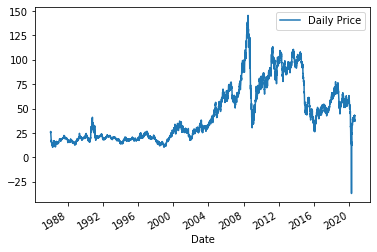

In [11]:
desc = ''

daily_price = EIA_Series('Daily Price','PET.RWTC.D')
daily_price.make_df()
daily_price.chart()

In [15]:
daily_price.show_response()

{'request': {'command': 'series', 'series_id': 'PET.RWTC.D'},
 'series': [{'copyright': 'Thomson-Reuters',
             'data': [['20200909', 38.05],
                      ['20200908', 36.87],
                      ['20200904', 39.69],
                      ['20200903', 41.39],
                      ['20200902', 42.76],
                      ['20200901', 42.76],
                      ['20200831', 42.61],
                      ['20200828', 42.96],
                      ['20200827', 42.88],
                      ['20200826', 43.21],
                      ['20200825', 43.17],
                      ['20200824', 42.44],
                      ['20200821', 42.32],
                      ['20200820', 42.62],
                      ['20200819', 42.91],
                      ['20200818', 42.89],
                      ['20200817', 42.89],
                      ['20200814', 42.05],
                      ['20200813', 42.26],
                      ['20200812', 42.6],
                      ['20200811',

                      ['20160923', 44.36],
                      ['20160922', 46.1],
                      ['20160921', 45.33],
                      ['20160920', 43.85],
                      ['20160919', 43.34],
                      ['20160916', 43.04],
                      ['20160915', 43.85],
                      ['20160914', 43.62],
                      ['20160913', 44.91],
                      ['20160912', 46.28],
                      ['20160909', 45.88],
                      ['20160908', 47.63],
                      ['20160907', 45.47],
                      ['20160906', 44.85],
                      ['20160905', 44.39],
                      ['20160902', 44.39],
                      ['20160901', 43.17],
                      ['20160831', 44.68],
                      ['20160830', 46.32],
                      ['20160829', 46.97],
                      ['20160826', 47.64],
                      ['20160825', 46.97],
                      ['20160824', 46.29],
            

                      ['20101013', 83.03],
                      ['20101012', 81.67],
                      ['20101011', 82.18],
                      ['20101008', 82.66],
                      ['20101007', 81.34],
                      ['20101006', 83.21],
                      ['20101005', 82.83],
                      ['20101004', 81.43],
                      ['20101001', 81.57],
                      ['20100930', 79.95],
                      ['20100929', 77.85],
                      ['20100928', 76.15],
                      ['20100927', 76.51],
                      ['20100924', 74.63],
                      ['20100923', 73.4],
                      ['20100922', 72.98],
                      ['20100921', 72.96],
                      ['20100920', 74.81],
                      ['20100917', 73.63],
                      ['20100916', 74.58],
                      ['20100915', 75.92],
                      ['20100914', 76.78],
                      ['20100913', 77.17],
            

                      ['20041025', 55.52],
                      ['20041022', 55.83],
                      ['20041021', 54.51],
                      ['20041020', 54.93],
                      ['20041019', 53.28],
                      ['20041018', 53.59],
                      ['20041015', 54.89],
                      ['20041014', 54.69],
                      ['20041013', 53.86],
                      ['20041012', 53.49],
                      ['20041011', 53.65],
                      ['20041008', 53.4],
                      ['20041007', 52.56],
                      ['20041006', 51.98],
                      ['20041005', 51.08],
                      ['20041004', 49.85],
                      ['20041001', 50.16],
                      ['20040930', 49.56],
                      ['20040929', 49.53],
                      ['20040928', 49.76],
                      ['20040927', 49.56],
                      ['20040924', 48.86],
                      ['20040923', 48.37],
            

                      ['19981026', 14.39],
                      ['19981023', 14.06],
                      ['19981022', 14],
                      ['19981021', 14.14],
                      ['19981020', 13.45],
                      ['19981019', 13.39],
                      ['19981016', 14.16],
                      ['19981015', 14.08],
                      ['19981014', 14.09],
                      ['19981013', 14.27],
                      ['19981012', 14.47],
                      ['19981009', 14.64],
                      ['19981008', 14.57],
                      ['19981007', 15.03],
                      ['19981006', 15.6],
                      ['19981005', 15.24],
                      ['19981002', 15.71],
                      ['19981001', 15.52],
                      ['19980930', 16.19],
                      ['19980929', 16.01],
                      ['19980928', 15.74],
                      ['19980925', 15.8],
                      ['19980924', 15.99],
                

                      ['19940225', 14.48],
                      ['19940224', 14.82],
                      ['19940223', 14.18],
                      ['19940222', 14.28],
                      ['19940218', 14.21],
                      ['19940217', 14.26],
                      ['19940216', 13.89],
                      ['19940215', 14.13],
                      ['19940214', 14.15],
                      ['19940211', 14.71],
                      ['19940210', 14.59],
                      ['19940209', 14.64],
                      ['19940208', 15.12],
                      ['19940207', 15.31],
                      ['19940204', 15.63],
                      ['19940203', 15.97],
                      ['19940202', 16.06],
                      ['19940201', 15.91],
                      ['19940131', 15.24],
                      ['19940128', 15.37],
                      ['19940127', 15.48],
                      ['19940126', 15.5],
                      ['19940125', 15.26],
            

                      ['19890801', 17.91],
                      ['19890731', 18.33],
                      ['19890728', 17.96],
                      ['19890727', 18.15],
                      ['19890726', 18.32],
                      ['19890725', 18.52],
                      ['19890724', 18.76],
                      ['19890721', 19.86],
                      ['19890720', 19.92],
                      ['19890719', 19.83],
                      ['19890718', 20.21],
                      ['19890717', 20.49],
                      ['19890714', 20.36],
                      ['19890713', 20.42],
                      ['19890712', 20.2],
                      ['19890711', 20.75],
                      ['19890710', 20.38],
                      ['19890707', 20.78],
                      ['19890706', 20.35],
                      ['19890705', 20.98],
                      ['19890704', 20.29],
                      ['19890703', 20.55],
                      ['19890630', 20.29],
            

## Daily Field Production in the US

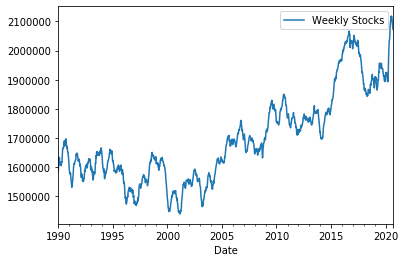

In [9]:
desc = ''

daily_production = EIA_Series('Weekly Stocks','PET.WTTSTUS1.W')
daily_production.make_df()
daily_production.chart()

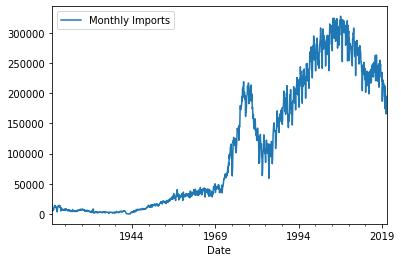

In [10]:
desc = 'US imports of crude oil, monthly'

monthly_imports = EIA_Series('Monthly Imports','PET.MCRIMUS1.M',desc )
monthly_imports.make_df('%Y%m')
monthly_imports.chart()

In [ ]:
monthly_imports.series_list[-1]

# To-Do

1. Moving averages?
2. Correlation between price and:
3. Features to add/explore:
    a. Active wells?
    b. Refinery inputs?
    c. consumption?
    d. month?
    e. 
    


# SCRAPS

In [ ]:
\
df_eia=functools.reduce(lambda x,y: x.join(y,how='outer'),frame_list)
df_eia.fillna(axis=0,method='ffill',inplace=True)

conn = sqlite3.connect('oilstocks.db')
c = conn.cursor()

for col in df_eia:
    df_eia[col]=preprocessing.scale(df_eia[col])

df_eia.to_sql("scaledstocks",conn,if_exists='replace')
conn.commit()

df_eia.to_sql("crudestocks",conn,if_exists='replace')